In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

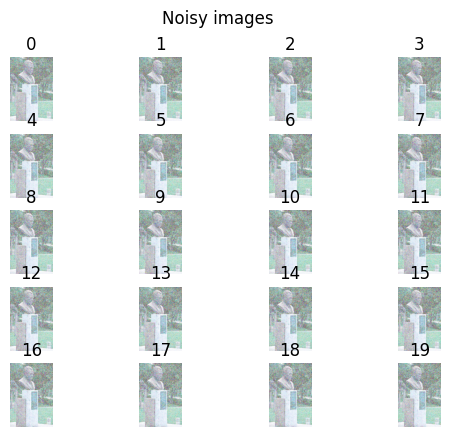

In [35]:
original_image = cv2.imread("Nsvn 00.jpg")

# Define the mean and standard deviation for Gaussian noise
mean = 0
stddev = 25  # You can adjust the standard deviation to control the amount of noise

noisy_images = []

# Generate Gaussian noise
for i in range(20):
    noise = np.random.normal(mean, stddev, original_image.shape).astype(np.uint8)
    noisy_images.append(cv2.add(original_image, noise))


for i in range(20):
    plt.subplot(5, 4, i + 1)
    plt.imshow(noisy_images[i], cmap='gray')
    plt.title(f'{i}')
    plt.axis('off')
plt.suptitle("Noisy images")
plt.show()

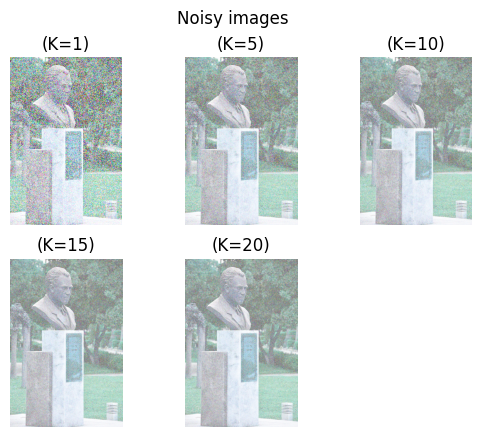

In [34]:
result_image = np.zeros_like(original_image, dtype=np.float32)


# Number of random noisy images to add (K=20)
K_values = [1, 5, 10, 15, 20]

averaged_images = {}

for K in K_values:
    # Take the first K noisy images
    selected_noisy_images = noisy_images[:K]

    # Calculate the average of the selected noisy images
    averaged_image = np.mean(selected_noisy_images, axis=0).astype(np.uint8)

    averaged_images[K] = averaged_image

for i, (K, averaged_image) in enumerate(averaged_images.items()):
    plt.subplot(2, 3, i + 1)
    plt.imshow(averaged_image, cmap='gray')
    plt.title(f'(K={K})')
    plt.axis('off')
plt.suptitle("Noisy images")
plt.show()